### Week 1: Predicting House Prices using Linear Regression 

- Objective: Implement linear regression to predict house prices based on 
features such as square footage, location, number of rooms, etc. 
- Skills: Data Cleaning, Linear Regression, Model Evaluation. 

In [300]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [301]:
# Load dataset
df = pd.read_csv("Housing.csv")

In [302]:
df.shape

(545, 13)

In [303]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Remove oultier

Text(0.5, 1.0, 'parking')

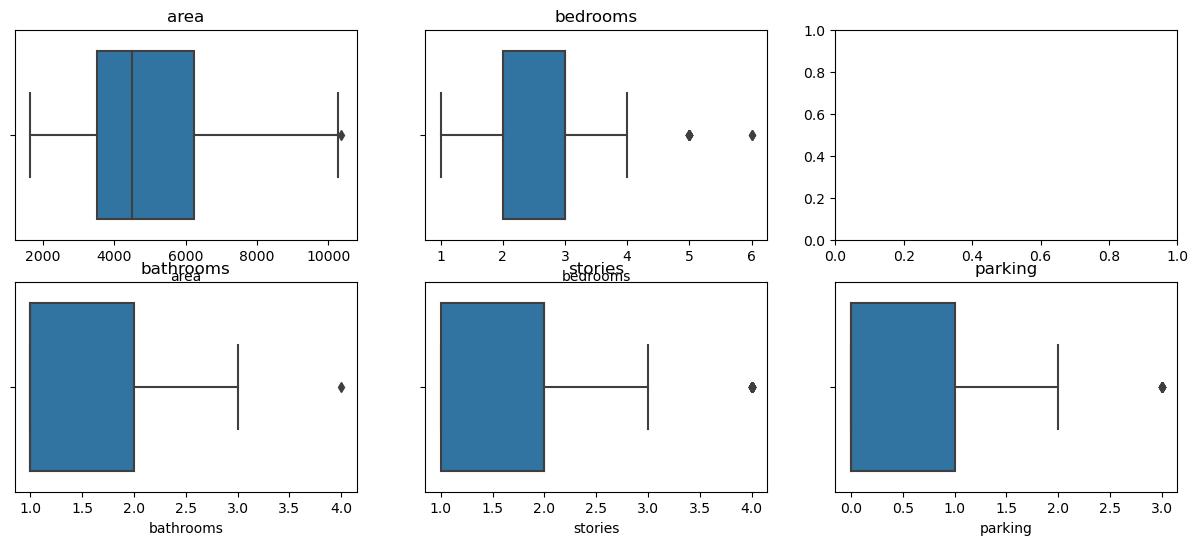

In [304]:
fig,axis=plt.subplots(2,3,figsize=(15,6))
sns.boxplot(new_df['area'],ax=axis[0,0])
axis[0,0].set_title("area")

sns.boxplot(df['bedrooms'],ax=axis[0,1])
axis[0,1].set_title("bedrooms")

sns.boxplot(df['bathrooms'],ax=axis[1,0])
axis[1,0].set_title("bathrooms")

sns.boxplot(df['stories'],ax=axis[1,1])
axis[1,1].set_title("stories")

sns.boxplot(df['parking'],ax=axis[1,2])
axis[1,2].set_title("parking")


In [305]:
import warnings
warnings.filterwarnings("ignore")

### Remove outlier from Area

In [306]:
# Finding the IQR
percentile25 = df['area'].quantile(0.25)
percentile75 = df['area'].quantile(0.75)

In [307]:
iqr = percentile75 - percentile25

In [308]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

### Bedrooms

In [309]:
# Finding the IQR
percentile25_bed = df['bedrooms'].quantile(0.25)
percentile75_bed = df['bedrooms'].quantile(0.75)

In [310]:
iqr_bed = percentile75_bed - percentile25_bed

In [311]:
upper_limit_bed = percentile75_bed + 1.5 * iqr_bed
lower_limit_bed = percentile25_bed - 1.5 * iqr_bed

In [312]:
upper_limit_bath = percentile75_bath + 1.5 * iqr_bath
lower_limit_bath = percentile25_bath - 1.5 * iqr_bath

## Finding Outliers

In [313]:
df[df['area'] > upper_limit]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


####  bedrooms

In [314]:
df[df['bedrooms'] > upper_limit_bed]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
28,8400000,7950,5,2,2,yes,no,yes,yes,no,2,no,unfurnished
34,8120000,6840,5,1,2,yes,yes,yes,no,yes,1,no,furnished
89,6440000,8580,5,3,2,yes,no,no,no,no,2,no,furnished
112,6083000,4300,6,2,2,yes,no,no,no,no,0,no,furnished
143,5600000,4800,5,2,3,no,no,yes,yes,no,0,no,unfurnished
152,5565000,5400,5,1,2,yes,yes,yes,no,yes,0,yes,furnished
271,4340000,1905,5,1,2,no,no,yes,no,no,0,no,semi-furnished
340,3850000,5300,5,2,2,yes,no,no,no,no,0,no,semi-furnished
356,3773000,2520,5,2,1,no,no,yes,no,yes,1,no,furnished


## Trimming

In [315]:
df = df[df['area'] < upper_limit]

In [316]:
df=df[df['bedrooms'] < upper_limit_bed]

In [317]:
df.shape

(519, 13)

Text(0.5, 1.0, 'parking')

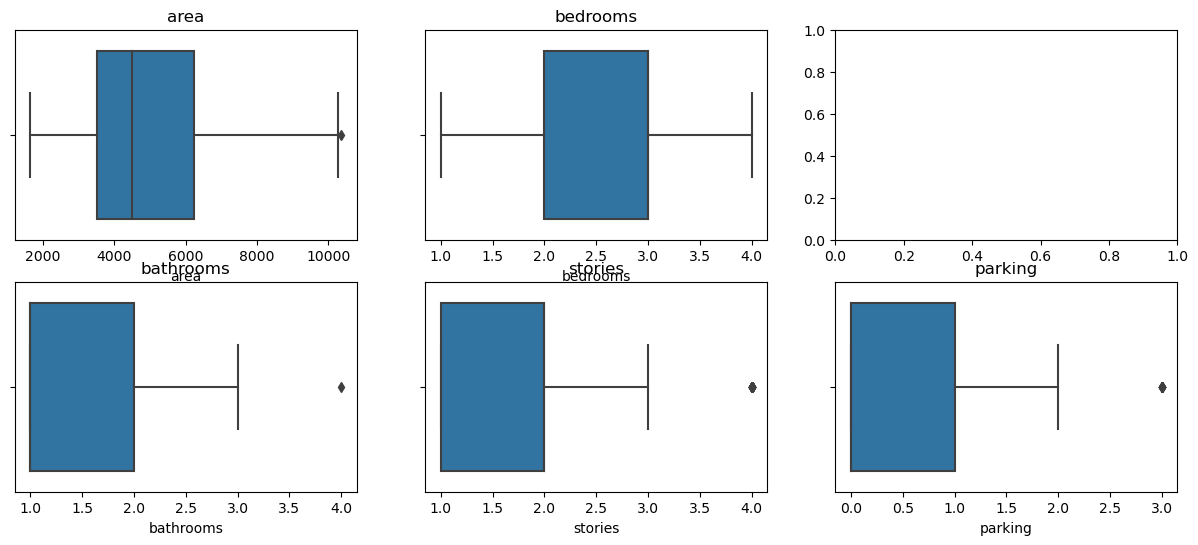

In [318]:
fig,axis=plt.subplots(2,3,figsize=(15,6))
sns.boxplot(new_df['area'],ax=axis[0,0])
axis[0,0].set_title("area")

sns.boxplot(df['bedrooms'],ax=axis[0,1])
axis[0,1].set_title("bedrooms")

sns.boxplot(df['bathrooms'],ax=axis[1,0])
axis[1,0].set_title("bathrooms")

sns.boxplot(df['stories'],ax=axis[1,1])
axis[1,1].set_title("stories")

sns.boxplot(df['parking'],ax=axis[1,2])
axis[1,2].set_title("parking")

In [319]:
# Create a new feature 'square_footage' based on area, bedrooms, and stories
df['square_footage'] = df['area'] * (df['bedrooms'] + df['stories'])

In [320]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,square_footage
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,51940
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,71680
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,49800
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,45000
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,44520


In [321]:
df.drop(['area','bedrooms','stories'],axis=1,inplace=True)

In [322]:
df.head()

,price,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,square_footage
0,13300000,2,yes,no,no,no,yes,2,yes,furnished,51940
1,12250000,4,yes,no,no,no,yes,3,no,furnished,71680
2,12250000,2,yes,no,yes,no,no,2,yes,semi-furnished,49800
3,12215000,2,yes,no,yes,no,yes,3,yes,furnished,45000
4,11410000,1,yes,yes,yes,no,yes,2,no,furnished,44520


In [323]:
# Convert 'price' to a lower scale using log transformation
df['price'] = np.log1p(df['price'])

In [324]:
# Define features and target
X = df.drop(columns=['price'])
y = df['price']

In [325]:
df.head()

,price,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,square_footage
0,16.403275,2,yes,no,no,no,yes,2,yes,furnished,51940
1,16.321037,4,yes,no,no,no,yes,3,no,furnished,71680
2,16.321037,2,yes,no,yes,no,no,2,yes,semi-furnished,49800
3,16.318175,2,yes,no,yes,no,yes,3,yes,furnished,45000
4,16.250001,1,yes,yes,yes,no,yes,2,no,furnished,44520


In [326]:
# Identify categorical and numerical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_cols = ['bathrooms', 'parking','square_footage']

In [327]:
# Create ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
])

In [328]:
# Create pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [329]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [330]:
# Train the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bathrooms', 'parking',
                                                   'square_footage']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('model', LinearRegression())])

In [331]:
# Predict
y_pred = pipe.predict(X_test)

In [332]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MAE: 0.17882067946224656
RMSE: 0.23097327428072562
R2 Score: 0.6963453615038748


In [333]:
import pickle
pickle.dump(df,open("df.pkl","wb"))

In [334]:
pickle.dump(pipe,open('pipe.pkl',"wb"))

In [336]:
X_train.head()

,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,square_footage
458,1,yes,no,no,no,no,0,no,unfurnished,19250
543,1,no,no,no,no,no,0,no,furnished,11640
228,1,yes,no,no,no,no,2,no,semi-furnished,18150
354,1,yes,no,no,no,no,1,no,furnished,25200
240,1,yes,no,no,no,no,1,yes,semi-furnished,19200
